## Dataset Description: MNIST Handwritten Digits

The MNIST (Modified National Institute of Standards and Technology) dataset is a widely used benchmark dataset in machine learning and computer vision. It contains 70,000 grayscale images of handwritten digits (0–9). Each image is 28×28 pixels, which is flattened into a 784-dimensional feature vector.

- Number of samples: 70,000
- Number of features per sample: 784 (28×28 pixels)
- Pixel values: 0–255 (grayscale intensity)
- Labels: Digits 0–9
  
This dataset is commonly used for tasks such as classification, clustering, and dimensionality reduction.

## Project Task
- Clustering: Grouping similar handwritten digits based on pixel patterns without using label information.
- Dimensionality Reduction: Reducing the high-dimensional 784-feature data to a lower-dimensional space (e.g., 2D or 3D) for:
- Visualization of patterns and clusters
- Improving computational efficiency for clustering algorithms

Techniques such as PCA (Principal Component Analysis), t-SNE, and SVD (Singular Value Decomposition) will be applied for dimensionality reduction.

### Importing libraries

In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, adjusted_rand_score

### Load data

In [2]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', version=1)

In [3]:
X = mnist.data
y = mnist.target

### Dataset Overview

In [4]:
X.shape

(70000, 784)

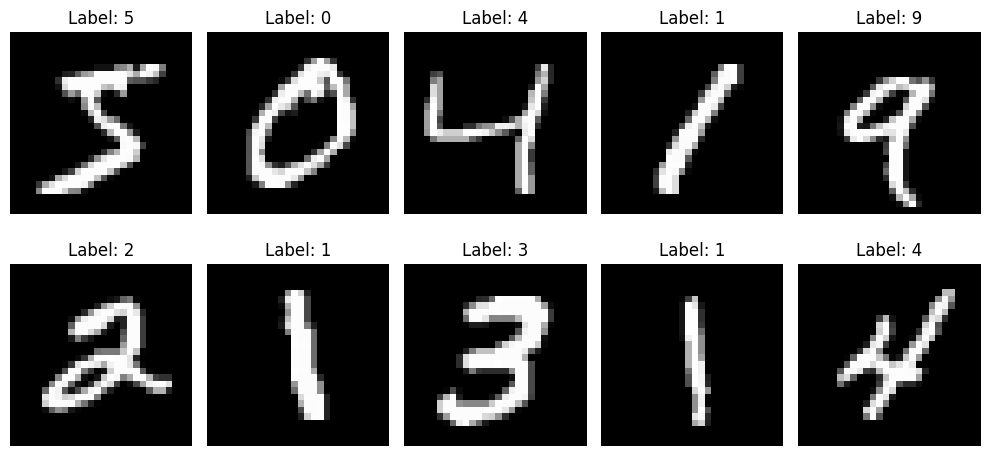

In [5]:
# checking the dataset by showing different inputs
fig, axes = plt.subplots(2, 5, figsize=(10, 5))
for i, ax in enumerate(axes.flat):
    image = X.iloc[i].to_numpy().reshape(28, 28)
    ax.imshow(image, cmap='gray')
    ax.set_title(f"Label: {y[i]}")
    ax.axis('off')
plt.tight_layout()
plt.show()

### Preprocessing

In [6]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [7]:
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)

#### Difference in dataset after scaling

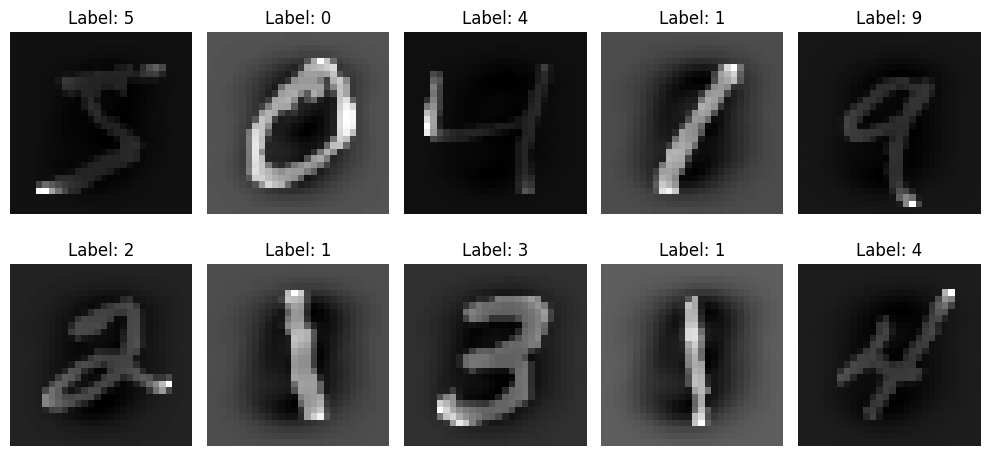

In [8]:
# checking the dataset by showing different inputs
fig, axes = plt.subplots(2, 5, figsize=(10, 5))
for i, ax in enumerate(axes.flat):
    image = X_scaled.iloc[i].to_numpy().reshape(28, 28)
    ax.imshow(image, cmap='gray')
    ax.set_title(f"Label: {y[i]}")
    ax.axis('off')
plt.tight_layout()
plt.show()

### PCA for Visualization

In [9]:
pca_2d = PCA(n_components=2)
X_pca_2d = pca_2d.fit_transform(X_scaled)

In [10]:
y = mnist.target.astype(int)

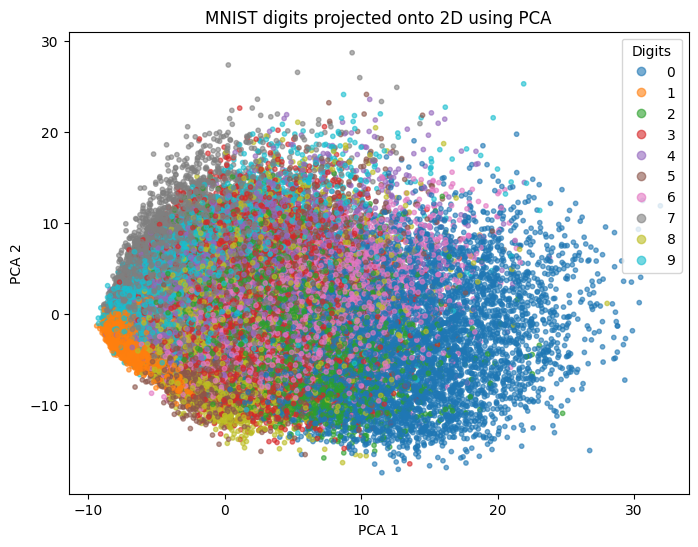

In [11]:
plt.figure(figsize=(8,6))
scatter = plt.scatter(X_pca_2d[:,0], X_pca_2d[:,1], c=y, cmap='tab10', s=10, alpha=0.6)
plt.legend(*scatter.legend_elements(), title="Digits")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.title("MNIST digits projected onto 2D using PCA")
plt.show()

### PCA for dimensionality reduction (for clustering)

In [12]:
pca_full = PCA()
pca_full.fit(X_scaled)

explained_var = np.cumsum(pca_full.explained_variance_ratio_)

In [13]:
len(explained_var)

784

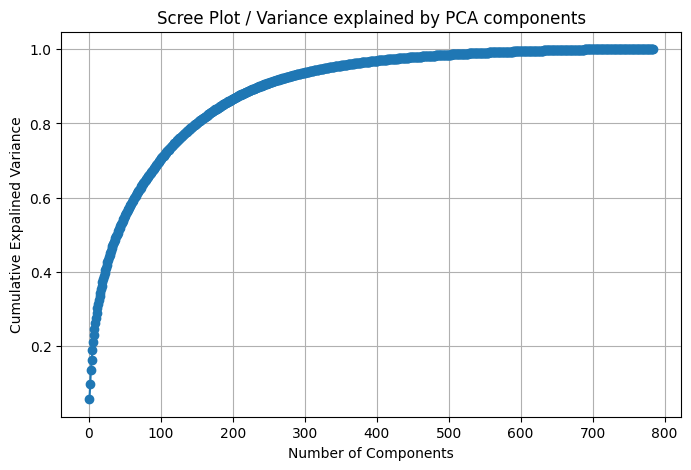

In [14]:
plt.figure(figsize=(8,5))
plt.plot(np.arange(1,785),explained_var, marker='o')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Expalined Variance')
plt.title('Scree Plot / Variance explained by PCA components')
plt.grid(True)
plt.show()

In [17]:
n_components_90 = np.argmax(explained_var >= 0.90) + 1
n_components_90

np.int64(238)

In [20]:
pca_238 = PCA(n_components=238)
X_pca = pca_238.fit_transform(X_scaled)

## Clustering

### K-means

In [22]:
kmeans = KMeans(n_clusters=10, random_state=42)
y_kmeans = kmeans.fit_predict(X_pca)

In [23]:
silhouette_avg = silhouette_score(X_pca, y_kmeans)
print('Silhouette Score: ', silhouette_avg)

Silhouette Score:  0.02134495701585113


In [24]:
ari = adjusted_rand_score(y, y_kmeans)
print(f"Adjusted Rand Index: {ari:.4f}")

Adjusted Rand Index: 0.3241


n_clusters=10 because MNIST has 10 digits (0–9).

Silhouette Score → internal metric (measures how well-separated the clusters are).

Adjusted Rand Index (ARI) → external metric (compares predicted clusters with actual digit labels).

#### Interpretation
For unsupervised learning (like clustering), an ARI around 0.3–0.4 on MNIST is quite normal,
because digits are complex shapes, and KMeans (which assumes spherical clusters) isn’t great at separating them.

### kmeans with X_pca_50

In [45]:
from sklearn.decomposition import PCA

pca = PCA(n_components=50, random_state=42)
X_pca_50 = pca.fit_transform(X_scaled)

In [46]:
kmeans = KMeans(n_clusters=10, random_state=42)
y_kmeans = kmeans.fit_predict(X_pca_50)

In [43]:
silhouette_score(X_pca_50, y_kmeans)

np.float64(0.07365527502690138)

In [47]:
adjusted_rand_score(y, y_kmeans)

0.3237650932624858

### Confusion Matrix

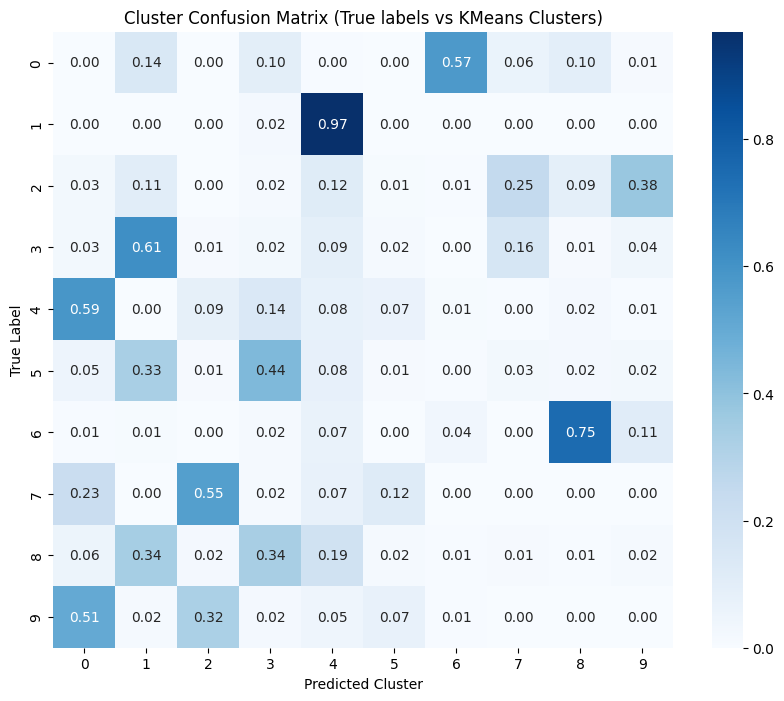

In [26]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y, y_kmeans)
cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt=".2f", cmap="Blues",
            xticklabels=np.unique(y),
            yticklabels=np.unique(y))
plt.title("Cluster Confusion Matrix (True labels vs KMeans Clusters)")
plt.xlabel("Predicted Cluster")
plt.ylabel("True Label")
plt.show()

### t-SNE Visualization

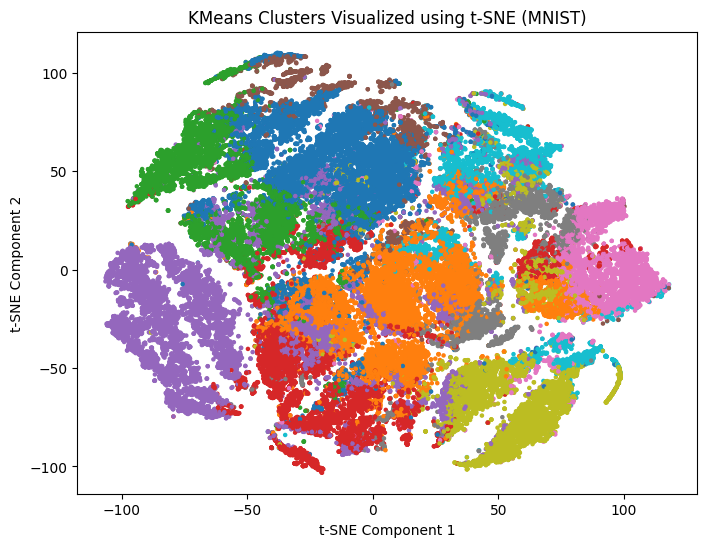

In [29]:
tsne = TSNE(n_components=2, random_state=42, perplexity=30, max_iter=1000)
X_tsne = tsne.fit_transform(X_pca)

plt.figure(figsize=(8, 6))
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=y_kmeans, cmap='tab10', s=5)
plt.title("KMeans Clusters Visualized using t-SNE (MNIST)")
plt.xlabel("t-SNE Component 1")
plt.ylabel("t-SNE Component 2")
plt.show()

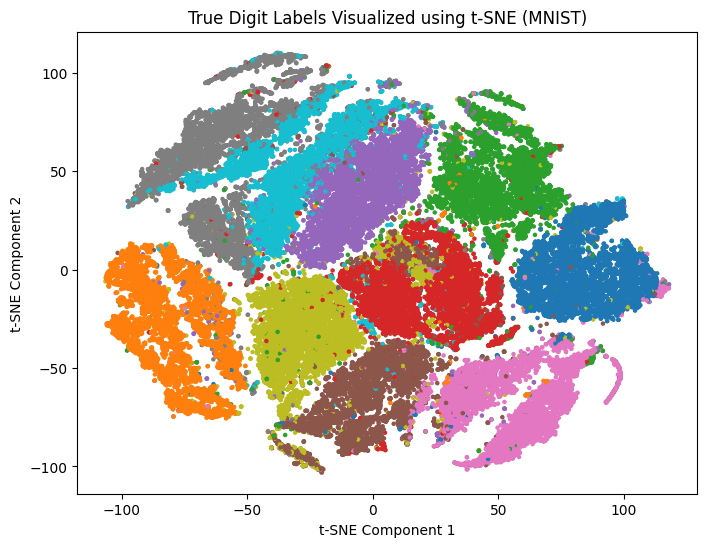

In [30]:
plt.figure(figsize=(8, 6))
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=y.astype(int), cmap='tab10', s=5)
plt.title("True Digit Labels Visualized using t-SNE (MNIST)")
plt.xlabel("t-SNE Component 1")
plt.ylabel("t-SNE Component 2")
plt.show()